In [8]:
import pandas as pd

# Load the data
df = pd.read_csv('../data/winequality-red.csv')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
# Check for missing values
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
# Drop duplicate rows
df = df.drop_duplicates()
df.shape


(1359, 12)

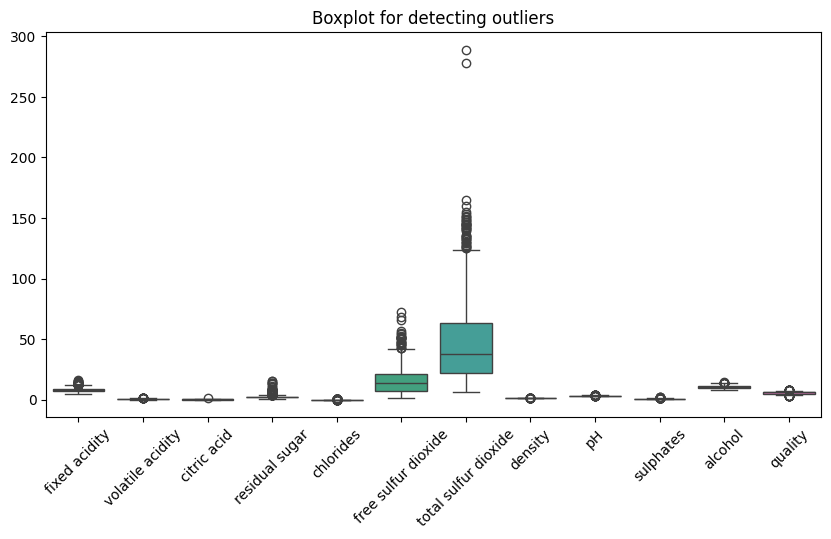

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot for detecting outliers")
plt.show()


In [15]:
from sklearn.preprocessing import StandardScaler

X = df.drop('quality', axis=1)
y = df['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [16]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [17]:
# Convert quality into 3 categories: bad (3-4), average (5-6), good (7-8)
def quality_label(q):
    if q <= 4:
        return 0  # bad
    elif q <= 6:
        return 1  # average
    else:
        return 2  # good

df['quality_label'] = df['quality'].apply(quality_label)

# Update target
y = df['quality_label']


In [18]:
y.head(20)

0     1
1     1
2     1
3     1
5     1
6     1
7     2
8     2
9     1
10    1
12    1
13    1
14    1
15    1
16    2
17    1
18    0
19    1
20    1
21    1
Name: quality_label, dtype: int64

In [19]:
#test train split 80-20

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


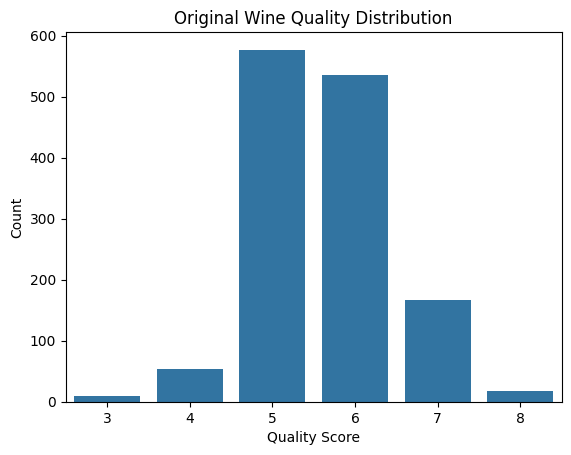

In [20]:
#distribution of wine quality beofre (label encoding)
sns.countplot(x='quality', data=df)
plt.title("Original Wine Quality Distribution")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.show()


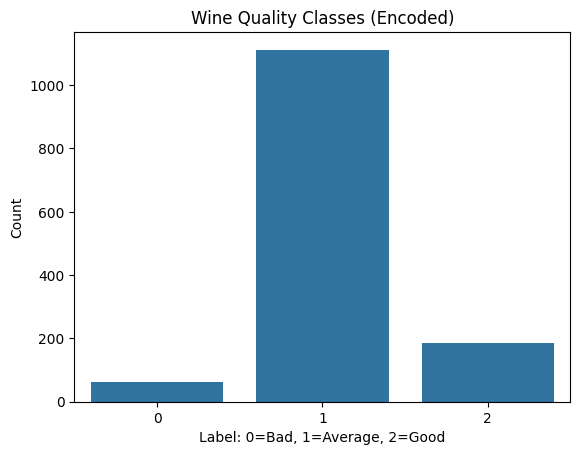

In [21]:
# Distribution of Wine Quality Labels (after encoding)

sns.countplot(x='quality_label', data=df)
plt.title("Wine Quality Classes (Encoded)")
plt.xlabel("Label: 0=Bad, 1=Average, 2=Good")
plt.ylabel("Count")
plt.show()


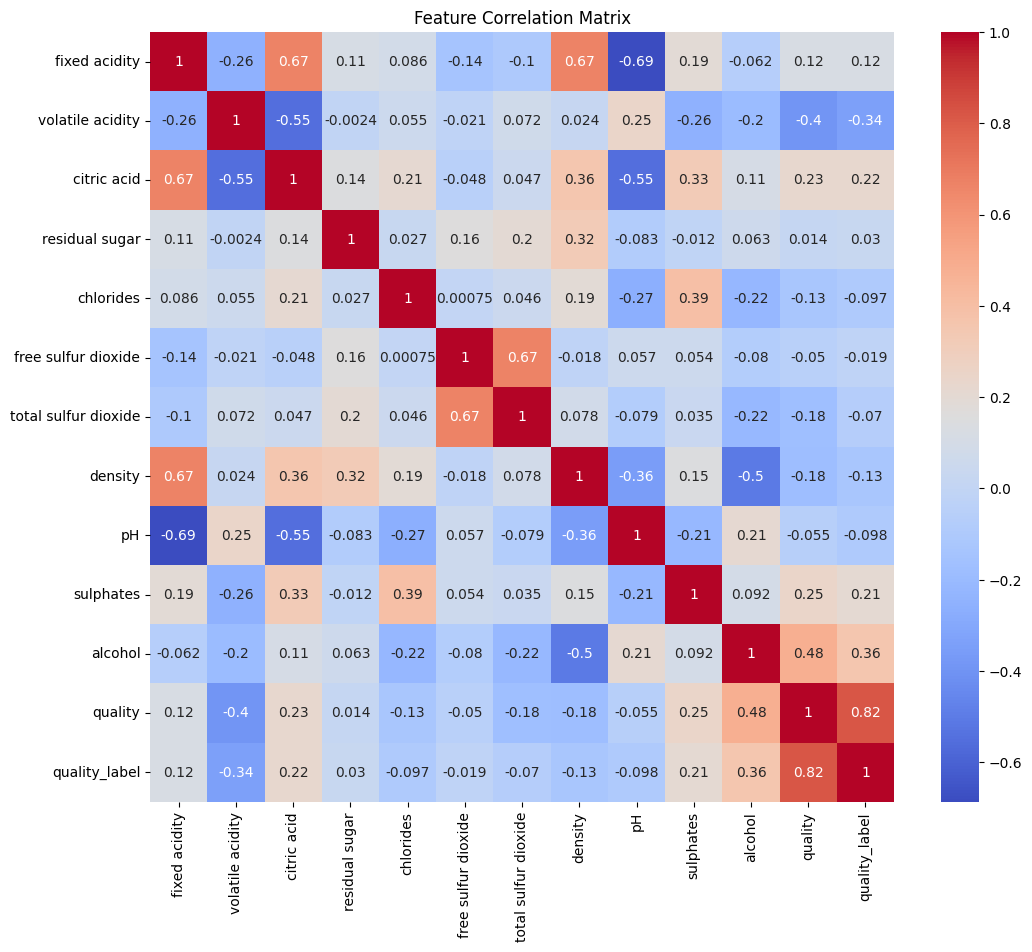

In [22]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()



In [23]:
# MODEL SELECTION

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))



Logistic Regression
Accuracy: 0.8382352941176471
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.85      0.97      0.91       222
           2       0.68      0.35      0.46        37

    accuracy                           0.84       272
   macro avg       0.51      0.44      0.46       272
weighted avg       0.79      0.84      0.80       272


Random Forest
Accuracy: 0.8455882352941176
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.86      0.96      0.91       222
           2       0.67      0.43      0.52        37

    accuracy                           0.85       272
   macro avg       0.51      0.47      0.48       272
weighted avg       0.79      0.85      0.81       272


SVM
Accuracy: 0.8455882352941176
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
 

C:\Users\Asus tuf\OneDrive\Desktop\New folder\Red wine quality\env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus tuf\OneDrive\Desktop\New folder\Red wine quality\env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus tuf\OneDrive\Desktop\New folder\Red wine quality\env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

In [24]:
# Very imbalanced data - handled by SMOTE

from imblearn.over_sampling import SMOTE

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Check new class distribution
from collections import Counter
print("After SMOTE:", Counter(y_resampled))

# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


After SMOTE: Counter({1: 1112, 2: 1112, 0: 1112})


In [25]:
# Retrain models on new data
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

models = {
    "Random Forest (SMOTE)": RandomForestClassifier(random_state=42),
    "SVM (SMOTE)": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


    # Here we conclude that Random forest performs the best




Random Forest (SMOTE)
Accuracy: 0.9266467065868264
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       222
           1       0.93      0.84      0.88       223
           2       0.88      0.97      0.93       223

    accuracy                           0.93       668
   macro avg       0.93      0.93      0.93       668
weighted avg       0.93      0.93      0.93       668


SVM (SMOTE)
Accuracy: 0.8263473053892215
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       222
           1       0.77      0.69      0.73       223
           2       0.82      0.88      0.85       223

    accuracy                           0.83       668
   macro avg       0.82      0.83      0.82       668
weighted avg       0.82      0.83      0.82       668



In [27]:
# Hyperparameter Tuning with GridSearchCV

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='f1_weighted', cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_resampled, y_resampled)
best_rf = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)



Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


C:\Users\Asus tuf\AppData\Local\Temp\ipykernel_3676\3414549790.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


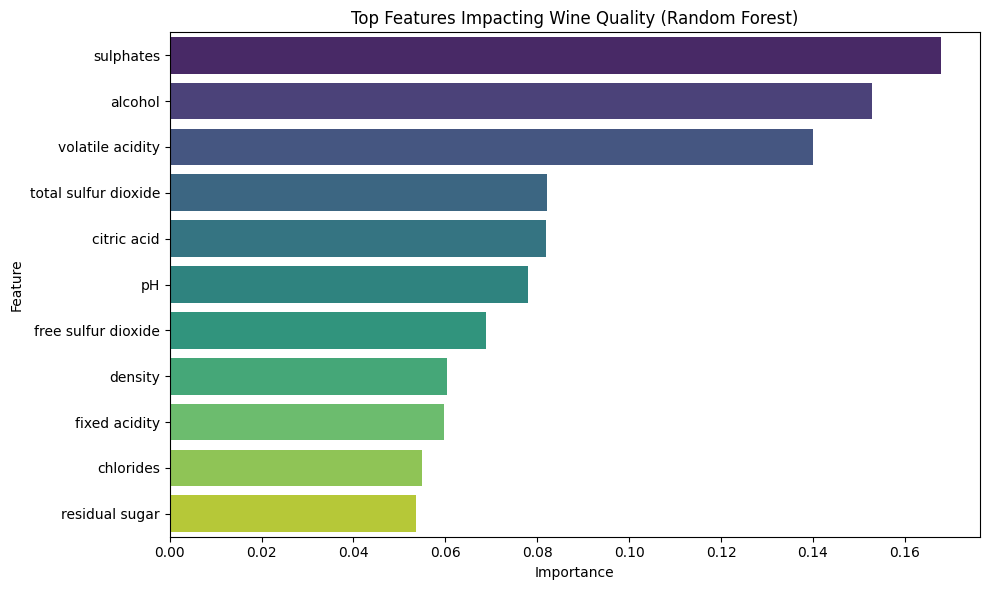

In [28]:
# feature importance

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

importances = best_rf.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Top Features Impacting Wine Quality (Random Forest)")
plt.tight_layout()
plt.show()


In [29]:
# Cross validation

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf, X_resampled, y_resampled, cv=5, scoring='f1_weighted')
print("Cross-validation F1 Scores:", cv_scores)
print("Average F1 Score:", cv_scores.mean())


Cross-validation F1 Scores: [0.93842547 0.89771139 0.90809709 0.87859036 0.90089968]
Average F1 Score: 0.9047447999186801


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       222
           1       1.00      1.00      1.00       223
           2       1.00      1.00      1.00       223

    accuracy                           1.00       668
   macro avg       1.00      1.00      1.00       668
weighted avg       1.00      1.00      1.00       668



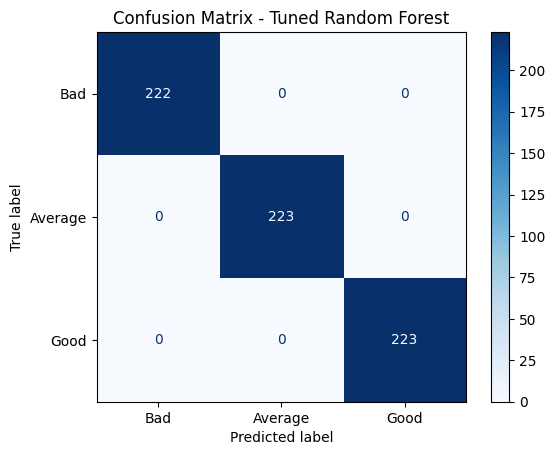

In [30]:
# final classificaion report
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))

# Optional Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Bad", "Average", "Good"], cmap='Blues')
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()


In [36]:
from IPython.display import FileLink

FileLink("wine_quality_model.pkl")


C:\Users\Asus tuf\OneDrive\Desktop\New folder\Red wine quality\notebooks\wine_quality_model.pkl

In [37]:
FileLink("scaler.pkl")

C:\Users\Asus tuf\OneDrive\Desktop\New folder\Red wine quality\notebooks\scaler.pkl

In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'  # helps further
)
model.fit(X_train, y_train)



RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [28]:
import numpy as np
import joblib

# Load the trained model and scaler
model = joblib.load("wine_quality_model.pkl")
scaler = joblib.load("scaler.pkl")

# Label mapping
label_map = {0: "Bad", 1: "Average", 2: "Good"}

# Define test cases
test_cases = {
    "Bad":     [4.6, 0.99, 0.0, 0.9, 0.089, 2.0, 9.0, 0.9970, 3.5, 0.3, 8.4],
    "Average": [7.4, 0.70, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4],
    "Good":    [6.0, 0.28, 0.56, 1.9, 0.045, 45.0, 170.0, 0.9908, 3.22, 0.75, 12.8]
}

# Predict for each test case
for name, features in test_cases.items():
    sample = np.array([features])
    scaled = scaler.transform(sample)
    pred = model.predict(scaled)[0]
    proba = model.predict_proba(scaled)[0]
    
    print(f"--- {name} Wine ---")
    print(f"Predicted Class: {pred} => {label_map[pred]}")
    print(f"Class Probabilities: Bad: {proba[0]:.2f}, Average: {proba[1]:.2f}, Good: {proba[2]:.2f}")
    print()


--- Bad Wine ---
Predicted Class: 1 => Average
Class Probabilities: Bad: 0.34, Average: 0.65, Good: 0.02

--- Average Wine ---
Predicted Class: 1 => Average
Class Probabilities: Bad: 0.02, Average: 0.98, Good: 0.00

--- Good Wine ---
Predicted Class: 1 => Average
Class Probabilities: Bad: 0.00, Average: 0.56, Good: 0.44



C:\Users\Asus tuf\OneDrive\Desktop\New folder\Red wine quality\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Asus tuf\OneDrive\Desktop\New folder\Red wine quality\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Asus tuf\OneDrive\Desktop\New folder\Red wine quality\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [33]:
# trying XGBoost
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from collections import Counter
import joblib

# 2. Load Your Dataset
df = pd.read_csv('../data/winequality-red.csv')

# 3. Convert to Quality Labels
def quality_label(q):
    if q <= 4:
        return 0  # Bad
    elif q <= 6:
        return 1  # Average
    else:
        return 2  # Good

df['quality_label'] = df['quality'].apply(quality_label)

# 4. Features & Target
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

# 5. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. SMOTE for Imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("Class distribution after SMOTE:", Counter(y_resampled))

# 7. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 8. Train XGBoost Classifier
model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
model.fit(X_train, y_train)

# 9. Evaluate Model
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["Bad", "Average", "Good"]))



# 11. Test Prediction on 3 Inputs
label_map = {0: "Bad", 1: "Average", 2: "Good"}

test_cases = {
    "Bad":     [4.6, 0.99, 0.0, 0.9, 0.089, 2.0, 9.0, 0.9970, 3.5, 0.3, 8.4],
    "Average": [7.4, 0.70, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4],
    "Good":    [6.0, 0.28, 0.56, 1.9, 0.045, 45.0, 170.0, 0.9908, 3.22, 0.75, 12.8]
}

print("\n📊 Test Predictions:\n")
for name, features in test_cases.items():
    sample = np.array([features])
    scaled = scaler.transform(sample)
    pred = model.predict(scaled)[0]
    proba = model.predict_proba(scaled)[0]
    print(f"--- {name} Wine ---")
    print(f"Predicted Class: {pred} => {label_map[pred]}")
    print(f"Class Probabilities: Bad: {proba[0]:.2f}, Average: {proba[1]:.2f}, Good: {proba[2]:.2f}\n")


Class distribution after SMOTE: Counter({1: 1319, 2: 1319, 0: 1319})


C:\Users\Asus tuf\OneDrive\Desktop\New folder\Red wine quality\env\lib\site-packages\xgboost\training.py:183: UserWarning: [19:32:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[260   3   1]
 [  6 232  26]
 [  0   4 260]]
              precision    recall  f1-score   support

         Bad       0.98      0.98      0.98       264
     Average       0.97      0.88      0.92       264
        Good       0.91      0.98      0.94       264

    accuracy                           0.95       792
   macro avg       0.95      0.95      0.95       792
weighted avg       0.95      0.95      0.95       792


📊 Test Predictions:

--- Bad Wine ---
Predicted Class: 0 => Bad
Class Probabilities: Bad: 0.51, Average: 0.49, Good: 0.00

--- Average Wine ---
Predicted Class: 1 => Average
Class Probabilities: Bad: 0.00, Average: 1.00, Good: 0.00

--- Good Wine ---
Predicted Class: 2 => Good
Class Probabilities: Bad: 0.00, Average: 0.11, Good: 0.89



C:\Users\Asus tuf\OneDrive\Desktop\New folder\Red wine quality\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Asus tuf\OneDrive\Desktop\New folder\Red wine quality\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Asus tuf\OneDrive\Desktop\New folder\Red wine quality\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [36]:
import joblib

# Save to current directory (or a folder like 'models')
joblib.dump(model, 'wine_quality_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [37]:
from IPython.display import FileLink

# Generate links
print("🔗 Download Trained Model:")
display(FileLink('wine_quality_model.pkl'))

print("🔗 Download Scaler:")
display(FileLink('scaler.pkl'))


🔗 Download Trained Model:


C:\Users\Asus tuf\OneDrive\Desktop\New folder\Red wine quality\notebooks\wine_quality_model.pkl

🔗 Download Scaler:


C:\Users\Asus tuf\OneDrive\Desktop\New folder\Red wine quality\notebooks\scaler.pkl